In [4]:
from skimage.feature import hog
from skimage.feature import local_binary_pattern as lbp
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mode = "pixels"
# mode = "hog"
# mode = "lbp"


# Fonction pour la Q11
def concat_hist_lbp(img):
    size = img.shape[0]
    hist_all = []

    # traitement par blocs 3x3
    for i in range(3):
        for j in range(3):
            block = img[i * size // 3:(i + 1) * size // 3, j * size // 3:(j + 1) * size // 3]
            lbp_img = lbp(block, 8, 1, method='uniform')
            hist, _ = np.histogram(lbp_img, bins=10, density=True)
            hist_all.append(hist)

    hist_all = np.concatenate(hist_all)

    return hist_all


# Q1

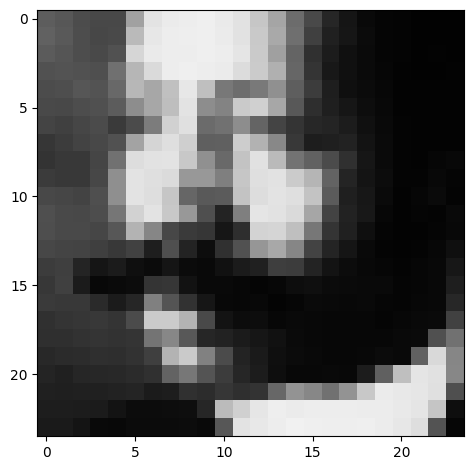

In [5]:
from skimage import io, util
i = 1
I = io.imread('imageface/train/pos/%05d.png'%i)
I = util.img_as_float(I)
io.imshow(I)

# Q2 & Q3

In [6]:
import numpy as np

if mode == "pixels":
    X_train = np.zeros((15000, 576))
if mode == "hog":
    X_train = np.zeros((15000, 81))
if mode == "lbp":
    X_train = np.zeros((15000, 90))

for i in range(3000):
    I = io.imread(f'imageface/train/pos/{i+1:05d}.png')
    I = util.img_as_float(I)
    if mode == "pixels":
        X_train[i] = I.flatten()
    if mode == "hog":
        X_train[i] = hog(I)
    if mode == "lbp":
        X_train[i] = concat_hist_lbp(I)

for i in range(12000):
    I = io.imread(f'imageface/train/neg/{i+1:05d}.png')
    I = util.img_as_float(I)
    if mode == "pixels":
        X_train[i+3000] = I.flatten()
    if mode == "hog":
        X_train[i+3000] = hog(I)
    if mode == "lbp":
        X_train[i+3000] = concat_hist_lbp(I)


y_train = np.ones(15000)
y_train[3000:] = -1

In [7]:
X_train.shape, y_train.shape

((15000, 576), (15000,))

# Q4

In [8]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

# Q5

In [9]:
if mode == "pixels":
    X_test = np.zeros((6256, 576))
if mode == "hog":
    X_test = np.zeros((6256, 81))
if mode == "lbp":
    X_test = np.zeros((6256, 90))

for i in range(1000):
    I = io.imread(f'imageface/test/pos/{i+1:05d}.png')
    I = util.img_as_float(I)
    if mode == "pixels":
        X_test[i] = I.flatten()
    if mode == "hog":
        X_test[i] = hog(I)
    if mode == "lbp":
        X_test[i] = concat_hist_lbp(I)

for i in range(5256):
    I = io.imread(f'imageface/test/neg/{i+1:05d}.png')
    I = util.img_as_float(I)
    if mode == "pixels":
        X_test[i+1000] = I.flatten()
    if mode == "hog":
        X_test[i+1000] = hog(I)
    if mode == "lbp":
        X_test[i+1000] = concat_hist_lbp(I)


y_test = np.ones(6256)
y_test[1000:] = -1

In [10]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {np.mean(y_pred == y_test)}")

Accuracy: 0.8407928388746803


# Q6

In [11]:
clf50 = AdaBoostClassifier(n_estimators=50)
clf50.fit(X_train, y_train)

y_pred50 = clf50.predict(X_test)

print(f"Accuracy: {np.mean(y_pred50 == y_test)}")

Accuracy: 0.8663682864450127


# Q7

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"KNN (5 neighbors): {np.mean(y_pred_knn == y_test)}")

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree: {np.mean(y_pred_dt == y_test)}")

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest: {np.mean(y_pred_rf == y_test)}")

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(f"SVM: {np.mean(y_pred_svc == y_test)}")

KNN (5 neighbors): 0.8706841432225064
Decision Tree: 0.8256074168797954
Random Forest: 0.9029731457800512
SVM: 0.9421355498721228


# Q8 & Q9

In [13]:
if mode == "pixels":
    X_test_flip_h = np.zeros((6256, 576))
if mode == "hog":
    X_test_flip_h = np.zeros((6256, 81))
if mode == "lbp":
    X_test_flip_h = np.zeros((6256, 90))

for i in range(1000):
    I = io.imread(f'imageface/test/pos/{i+1:05d}.png')
    I = util.img_as_float(I)
    I = np.fliplr(I)
    if mode == "pixels":
        X_test_flip_h[i] = I.flatten()
    if mode == "hog":
        X_test_flip_h[i] = hog(I)
    if mode == "lbp":
        X_test_flip_h[i] = concat_hist_lbp(I)

for i in range(5256):
    I = io.imread(f'imageface/test/neg/{i+1:05d}.png')
    I = util.img_as_float(I)
    I = np.fliplr(I)
    if mode == "pixels":
        X_test_flip_h[i+1000] = I.flatten()
    if mode == "hog":
        X_test_flip_h[i+1000] = hog(I)
    if mode == "lbp":
        X_test_flip_h[i+1000] = concat_hist_lbp(I)

y_test_flip_h = y_test.copy()

In [14]:
if mode == "pixels":
    X_test_flip_v = np.zeros((6256, 576))
if mode == "hog":
    X_test_flip_v = np.zeros((6256, 81))
if mode == "lbp":
    X_test_flip_v = np.zeros((6256, 90))

for i in range(1000):
    I = io.imread(f'imageface/test/pos/{i+1:05d}.png')
    I = util.img_as_float(I)
    I = np.flipud(I)
    if mode == "pixels":
        X_test_flip_v[i] = I.flatten()
    if mode == "hog":
        X_test_flip_v[i] = hog(I)
    if mode == "lbp":
        X_test_flip_v[i] = concat_hist_lbp(I)

for i in range(5256):
    I = io.imread(f'imageface/test/neg/{i+1:05d}.png')
    I = util.img_as_float(I)
    I = np.flipud(I)
    if mode == "pixels":
        X_test_flip_v[i+1000] = I.flatten()
    if mode == "hog":
        X_test_flip_v[i+1000] = hog(I)
    if mode == "lbp":
        X_test_flip_v[i+1000] = concat_hist_lbp(I)

y_test_flip_v = y_test.copy()

In [15]:
clf_pred_flip_h = clf.predict(X_test_flip_h)
clf_pred_flip_v = clf.predict(X_test_flip_v)
clf50_pred_flip_h = clf50.predict(X_test_flip_h)
clf50_pred_flip_v = clf50.predict(X_test_flip_v)
knn_pred_flip_h = knn.predict(X_test_flip_h)
knn_pred_flip_v = knn.predict(X_test_flip_v)
dt_pred_flip_h = dt.predict(X_test_flip_h)
dt_pred_flip_v = dt.predict(X_test_flip_v)
rf_pred_flip_h = rf.predict(X_test_flip_h)
rf_pred_flip_v = rf.predict(X_test_flip_v)
svc_pred_flip_h = svc.predict(X_test_flip_h)
svc_pred_flip_v = svc.predict(X_test_flip_v)

print(f"AdaBoost 10:\n\t- No flip: {np.mean(y_pred == y_test)}\n\t- Flip H: {np.mean(clf_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(clf_pred_flip_v == y_test_flip_v)}")
print(f"AdaBoost 50:\n\t- No flip: {np.mean(y_pred50 == y_test)}\n\t- Flip H: {np.mean(clf50_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(clf50_pred_flip_v == y_test_flip_v)}")
print(f"KNN:\n\t- No flip: {np.mean(y_pred_knn == y_test)}\n\t- Flip H: {np.mean(knn_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(knn_pred_flip_v == y_test_flip_v)}")
print(f"Decision Tree:\n\t- No flip: {np.mean(y_pred_dt == y_test)}\n\t- Flip H: {np.mean(dt_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(dt_pred_flip_v == y_test_flip_v)}")
print(f"Random Forest:\n\t- No flip: {np.mean(y_pred_rf == y_test)}\n\t- Flip H: {np.mean(rf_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(rf_pred_flip_v == y_test_flip_v)}")
print(f"SVM:\n\t- No flip: {np.mean(y_pred_svc == y_test)}\n\t- Flip H: {np.mean(svc_pred_flip_h == y_test_flip_h)}\n\t- Flip V: {np.mean(svc_pred_flip_v == y_test_flip_v)}")

AdaBoost 10:
	- No flip: 0.8407928388746803
	- Flip H: 0.8326406649616368
	- Flip V: 0.8361572890025576
AdaBoost 50:
	- No flip: 0.8663682864450127
	- Flip H: 0.8705242966751918
	- Flip V: 0.8294437340153452
KNN:
	- No flip: 0.8706841432225064
	- Flip H: 0.8842710997442456
	- Flip V: 0.819693094629156
Decision Tree:
	- No flip: 0.8256074168797954
	- Flip H: 0.8379156010230179
	- Flip V: 0.779571611253197
Random Forest:
	- No flip: 0.9029731457800512
	- Flip H: 0.8986572890025576
	- Flip V: 0.8511828644501279
SVM:
	- No flip: 0.9421355498721228
	- Flip H: 0.9456521739130435
	- Flip V: 0.8692455242966752


# Q10 & Q11
Décommenter la ligne correspondant au mode souhaité dans la première cellule, puis réexécuter toutes les cellules.